# Analysis on Business Transactions 2020

### Business Problem
The business aims to enhance overall profitability by performing an analysis of product and sales performance over the past year. The focus is on optimizing operational and marketing strategies, with specific attention to product categories and regional variations. The objective is to identify areas for improvement, understand key drivers of sales and profitability, and make data-driven decisions, optimizing our overall business performance.


### Objectives
- Which product categories have consistently demonstrated the highest sales and profitability over the past year?
- How do sales and profitability vary across different regions, and are there regions with untapped potential?
- Are there specific product categories where sales are high but profitability is lower than expected?
- How effective have our discounting strategies been in influencing sales, and is there an optimal discount threshold for maximizing profitability?
- What insights can we derive from the correlation between sales and discount levels?
- Which regions or categories experience a higher rate of product returns, and how does this impact overall profitability?
- What distinguishes the top-performing subcategories, and can these insights be applied to optimize sales strategies across other categories?
- How has the relationship between discount levels and profitability evolved over time, and what adjustments can be made to maintain a balance between sales and profitability?
- Are there specific operational or marketing interventions that can be implemented based on the analysis to enhance overall business performance?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import zscore

In [2]:
#load dataset per excel structure
df = pd.read_excel("data_messy.xlsx", sheet_name="Orders", header=5, usecols = "B:C,E:N", skipfooter=1)
df

,Order ID,Returned,Postal Code,Unnamed: 5,Product ID,Category,Unnamed: 8,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-114412,NaN,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,20%,5.4432
1,US-2017-156909,NaN,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,30%,-1.0196
2,CA-2017-107727,NaN,7090,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,20%,9.9468
3,CA-2017-120999,Yes,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,20%,16.5564
4,CA-2017-139619,NaN,1852,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,20%,9.5616
...,...,...,...,...,...,...,...,...,...,...,...,...
3307,CA-2017-163629,NaN,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0%,55.6470
3308,CA-2017-121258,Yes,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0%,15.6332
3309,CA-2017-121258,Yes,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,20%,19.3932
3310,CA-2017-121258,Yes,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0%,13.3200


In [3]:
#List columns
df.columns

Index(['Order ID', 'Returned', 'Postal Code', 'Unnamed: 5', 'Product ID',
       'Category', 'Unnamed: 8', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [4]:
#Rename columns
df = df.rename(columns={"Unnamed: 5":"Region","Unnamed: 8": "Sub-Category"})
df

,Order ID,Returned,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-114412,NaN,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,20%,5.4432
1,US-2017-156909,NaN,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,30%,-1.0196
2,CA-2017-107727,NaN,7090,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,20%,9.9468
3,CA-2017-120999,Yes,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,20%,16.5564
4,CA-2017-139619,NaN,1852,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,20%,9.5616
...,...,...,...,...,...,...,...,...,...,...,...,...
3307,CA-2017-163629,NaN,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0%,55.6470
3308,CA-2017-121258,Yes,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0%,15.6332
3309,CA-2017-121258,Yes,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,20%,19.3932
3310,CA-2017-121258,Yes,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0%,13.3200


In [5]:
#First Overview to see data types and count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3312 non-null   object 
 1   Returned      288 non-null    object 
 2   Postal Code   3312 non-null   int64  
 3   Region        3312 non-null   object 
 4   Product ID    3312 non-null   object 
 5   Category      3312 non-null   object 
 6   Sub-Category  3312 non-null   object 
 7   Product Name  3312 non-null   object 
 8   Sales         3312 non-null   float64
 9   Quantity      3312 non-null   int64  
 10  Discount      3312 non-null   object 
 11  Profit        3312 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 310.6+ KB


In [6]:
#Changing data types
df['Postal Code'] = df['Postal Code'].astype(object)
df.dtypes

Order ID         object
Returned         object
Postal Code      object
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount         object
Profit          float64
dtype: object

In [7]:
#Display Discount column
df['Discount']

0       20%
1       30%
2       20%
3       20%
4       20%
       ... 
3307     0%
3308     0%
3309    20%
3310     0%
3311     0%
Name: Discount, Length: 3312, dtype: object

In [8]:
#Convert discount type by removing '%'

#Create a function
def convert(d):
    value = d.replace('%','')
    d_value = float(value)/100
    return d_value

#Apply function
df['Discount'] = df['Discount'].apply(convert)
df['Discount']

0       0.2
1       0.3
2       0.2
3       0.2
4       0.2
       ... 
3307    0.0
3308    0.0
3309    0.2
3310    0.0
3311    0.0
Name: Discount, Length: 3312, dtype: float64

In [9]:
#Check for nulls
df.isnull().sum()

Order ID           0
Returned        3024
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [10]:
#Check null values
df['Returned']

0       NaN
1       NaN
2       NaN
3       Yes
4       NaN
       ... 
3307    NaN
3308    Yes
3309    Yes
3310    Yes
3311    NaN
Name: Returned, Length: 3312, dtype: object

In [11]:
#Fill null values in column with "No" as its a response of Yes or No column
df['Returned'].fillna("No", inplace=True)
df['Returned']

0        No
1        No
2        No
3       Yes
4        No
       ... 
3307     No
3308    Yes
3309    Yes
3310    Yes
3311     No
Name: Returned, Length: 3312, dtype: object

In [12]:
#Check for nulls
df.isnull().sum()

Order ID        0
Returned        0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#Checking for duplicates
df.duplicated().sum()
print("The number of duplicates found were",df.duplicated().sum())

The number of duplicates found were 0


In [14]:
#Describe dataset
df.describe()

,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340
std,585.257531,2.221776,0.207429,241.864342
min,0.444000,1.000000,0.000000,-3839.990400
25%,17.018000,2.000000,0.000000,1.763200
50%,53.810000,3.000000,0.200000,8.296800
75%,205.105700,5.000000,0.200000,28.315125
max,13999.960000,14.000000,0.800000,6719.980800


In [15]:
#Overview after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3312 non-null   object 
 1   Returned      3312 non-null   object 
 2   Postal Code   3312 non-null   object 
 3   Region        3312 non-null   object 
 4   Product ID    3312 non-null   object 
 5   Category      3312 non-null   object 
 6   Sub-Category  3312 non-null   object 
 7   Product Name  3312 non-null   object 
 8   Sales         3312 non-null   float64
 9   Quantity      3312 non-null   int64  
 10  Discount      3312 non-null   float64
 11  Profit        3312 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 310.6+ KB


In [16]:
df.to_excel("business_transactions_cleanset.xlsx", index = False)

In [17]:
#Display dataset
df

,Order ID,Returned,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-114412,No,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
1,US-2017-156909,No,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
2,CA-2017-107727,No,7090,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
3,CA-2017-120999,Yes,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564
4,CA-2017-139619,No,1852,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616
...,...,...,...,...,...,...,...,...,...,...,...,...
3307,CA-2017-163629,No,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
3308,CA-2017-121258,Yes,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
3309,CA-2017-121258,Yes,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
3310,CA-2017-121258,Yes,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200









# Visuals

In [18]:
#Display an overview of dataset
# Count of unique regions, subcategories, and categories
category_count = df['Category'].nunique()
sub_category_count = df['Sub-Category'].nunique()
region_count = df['Region'].nunique()

# Total sales, total quantity, total profit, and mean discount
total_sales = df['Sales'].sum()
total_quantity = df['Quantity'].sum()
total_profit = df['Profit'].sum()
mean_discount = df['Discount'].mean()

# Create a summary DataFrame
summary_data = {
    'Number of Category': [category_count],
    'Number of Sub-Category': [sub_category_count],
    'Numer of Regions': [region_count],
    'Total Quantity': [total_quantity],
    'Total Sales': [total_sales],
    'Total Profit': [total_profit],
    'Average Discount': [mean_discount]
}

summary_df = pd.DataFrame(summary_data)
summary_df

,Number of Category,Number of Sub-Category,Numer of Regions,Total Quantity,Total Sales,Total Profit,Average Discount
0,3,17,4,12476,733215.2552,93439.2696,0.156467


### Overview of the Dataset
The dataset gives us a snapshot of our business for the past year. We sold 12,476 products across three categories, 17 subcategories, and four regions. In total, our sales amounted to ($733,215.26), with an average profit of ($93,439.27) and an average discount of 15.65%.

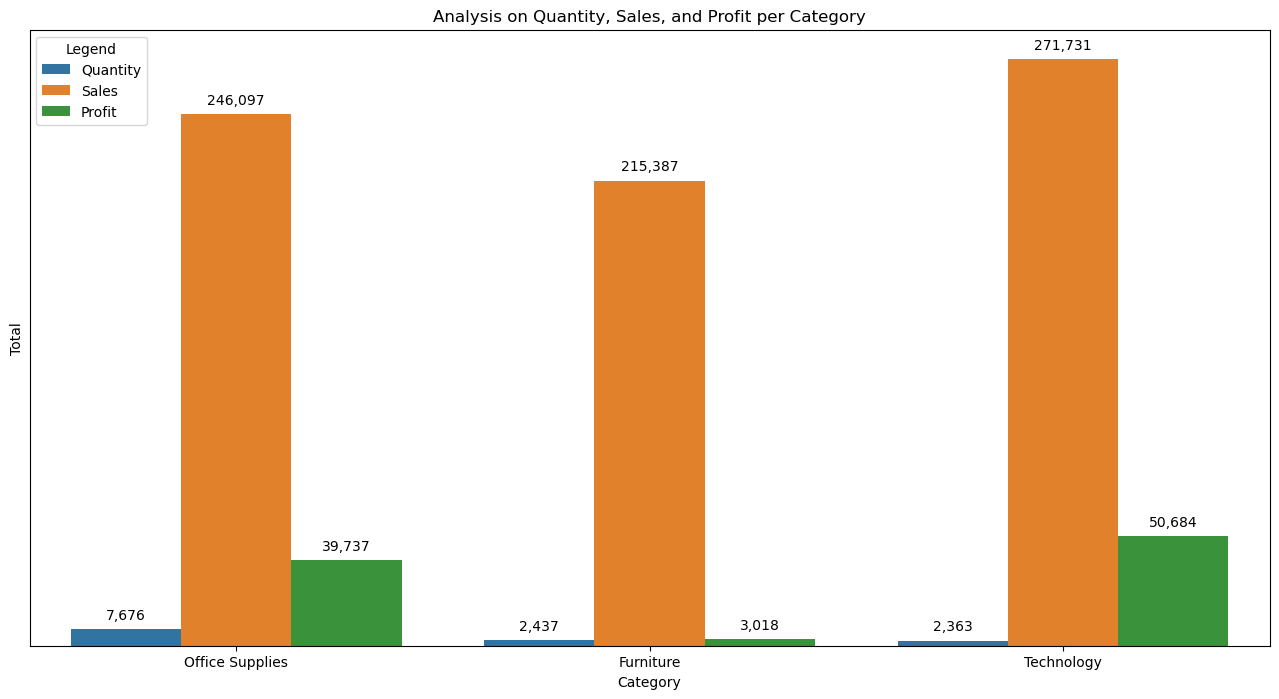

In [19]:
#Which product categories have consistently demonstrated the highest sales and profitability over the past year?
#Are there specific product categories where sales are high but profitability is lower than expected?

#Analysis on Quantity, Sales, and Profit per Category

# Reshape the DataFrame using pd.melt
df_melted = pd.melt(df, id_vars=['Category'], value_vars=['Quantity', 'Sales', 'Profit'])

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the bar chart
ax = sns.barplot(x='Category', y='value', hue='variable', data=df_melted, estimator=sum, errorbar=None)

# Annotate the bars with their values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title and labels
plt.title('Analysis on Quantity, Sales, and Profit per Category')
plt.ylabel('Total')

# Display the legend
plt.legend(title='Legend',loc='upper left')

# Hide the y-axis tick values
plt.yticks([])

# Show the plot
plt.show()

### Findings
Looking at our product categories, even though we sold the most office supplies (7,676 units), the technology category brought in the highest sales ($271,731) and profit ($50,684). 

### Recommendation
Focus on increasing sales in the technology category.

In [20]:
#The relationship between category and Subcategory
sub_table = df[['Sub-Category', 'Category', 'Sales', 'Quantity', 'Profit', 'Discount']]

# Group by subcategories and categories, and aggregate the required metrics
subcategory_table = sub_table.groupby(['Sub-Category', 'Category']).agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Display the resulting table
subcategory_table

,Sub-Category,Category,Quantity,Sales,Profit,Discount
0,Accessories,Technology,1079,59946.2320,15672.3570,0.072000
1,Appliances,Office Supplies,654,42926.9320,7865.2683,0.176364
2,Art,Office Supplies,1101,8863.0680,2221.9631,0.078723
3,Binders,Office Supplies,2067,72788.0450,7669.7418,0.378200
4,Bookcases,Furniture,276,30024.2797,-583.6261,0.214737
5,Chairs,Furniture,674,95554.3530,7643.5493,0.167368
6,Copiers,Technology,73,62899.3880,25031.7902,0.154545
7,Envelopes,Office Supplies,241,3378.5740,1441.7590,0.087324
8,Fasteners,Office Supplies,249,857.5940,304.9489,0.065625
9,Furnishings,Furniture,1097,28915.0940,4099.1628,0.129114


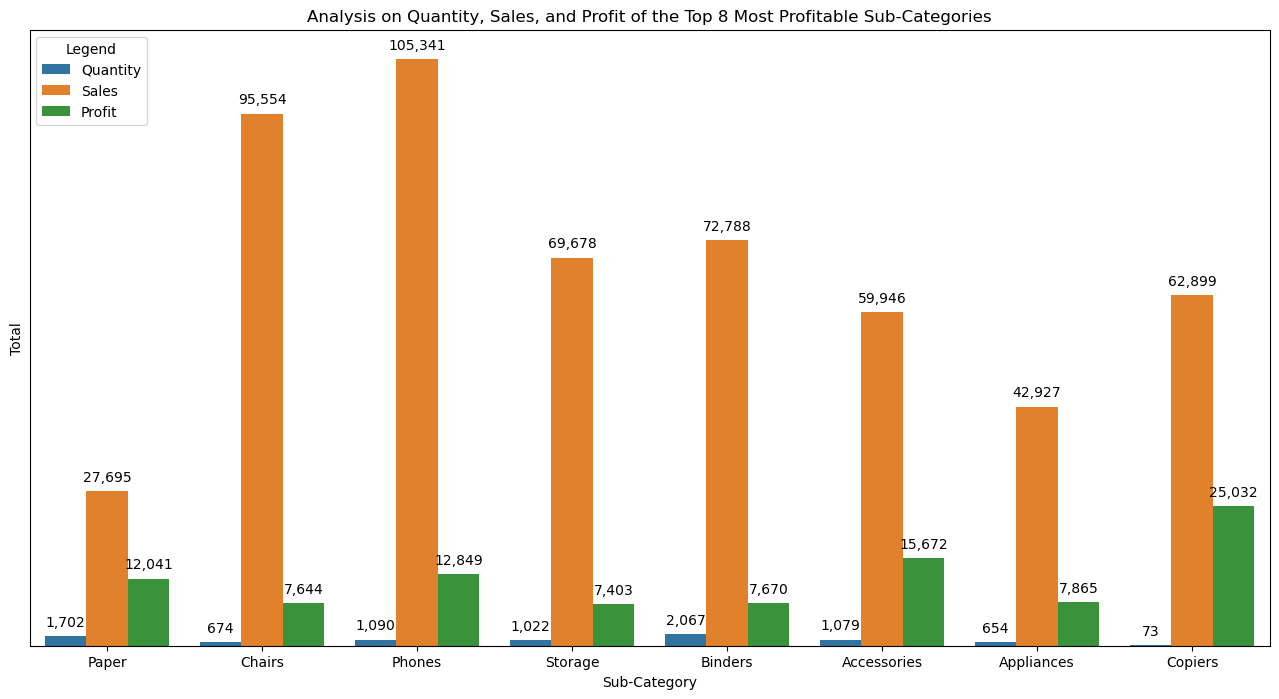

In [21]:
#Analysis on Quantity, Sales, and Profit of the Top 8 Most Profitable Sub-Categories
#What distinguishes the top-performing subcategories,
#and can these insights be applied to optimize sales strategies across other categories?

# Get top 8 in descending order
top_profitable_subcategories = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(8).index


# Set the figure size
plt.figure(figsize=(16, 8))

# Filter DataFrame for the top 5 profitable sub-categories
top_subcategory_df = df[df['Sub-Category'].isin(top_profitable_subcategories)]

# Melt the DataFrame for easier plotting
top_subcategory_melted = pd.melt(top_subcategory_df, id_vars=['Sub-Category'], value_vars=['Quantity', 'Sales', 'Profit'])

# Create a stacked bar plot for Quantity, Sales, and Profit per Sub-Category
ax = sns.barplot(x='Sub-Category', y='value', hue='variable', data=top_subcategory_melted, estimator=sum, errorbar=None)

# Annotate the bars with their values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Set the title and labels
plt.title('Analysis on Quantity, Sales, and Profit of the Top 8 Most Profitable Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Total')

# Display the legend
plt.legend(title='Legend',loc='upper left')

# Hide the y-axis tick values
plt.yticks([])

# Show the plot
plt.show()


### Findings
Digging deeper into the most profitable subcategories, we find that even though Copiers had the least quantity sold (72), it brought in the highest profit ($25,032). Accessories and Phones also stand out as high-profit subcategories. All under the technology category.

### Recommendation
Investing more in technology would yield more profit.

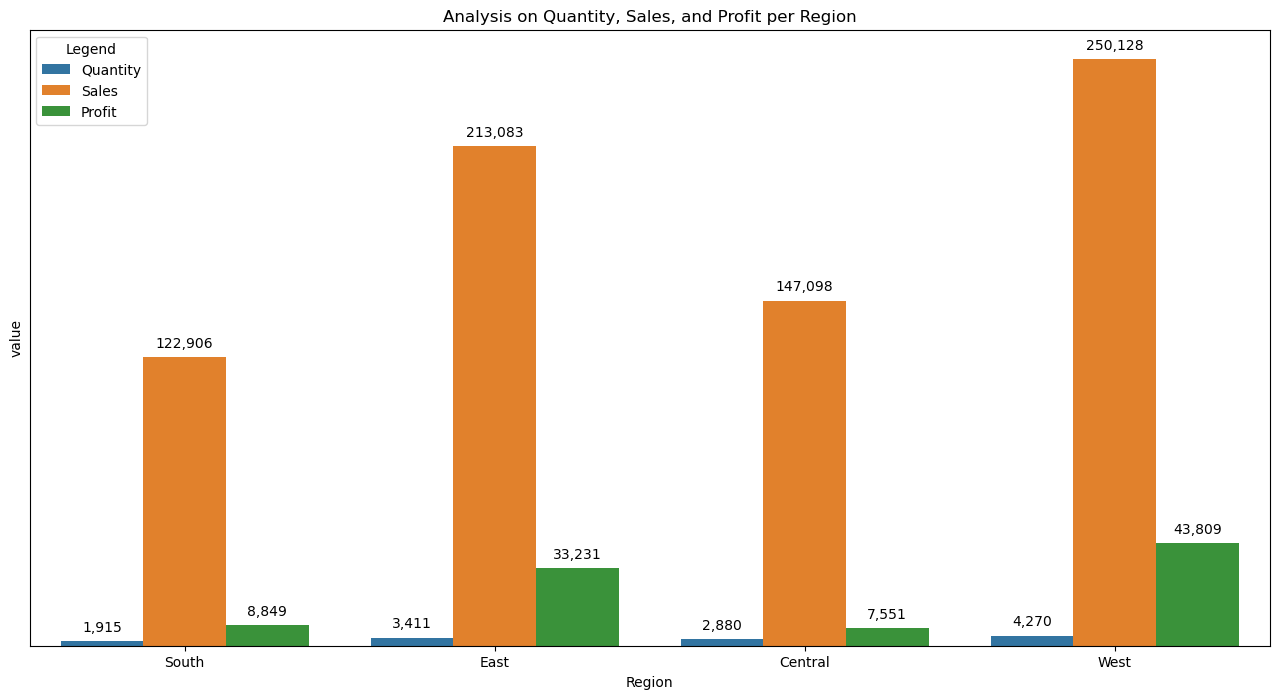

In [22]:
#How do sales and profitability vary across different regions, and are there regions with untapped potential?
#Analysis on Quantity, Sales, and Profit per Region

# Reshape the DataFrame using pd.melt
df_melted = pd.melt(df, id_vars=['Region'], value_vars=['Quantity', 'Sales', 'Profit'])

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the bar chart
ax = sns.barplot(x='Region', y='value', hue='variable', data=df_melted, estimator=sum, errorbar=None)

# Annotate the bars with their values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title and labels
plt.title('Analysis on Quantity, Sales, and Profit per Region')


# Display the legend
plt.legend(title='Legend',loc='upper left')

# Hide the y-axis tick values
plt.yticks([])

# Show the plot
plt.show()

### Findings
When we look at regions, the West outperformed with the highest profit ($43,809), sales ($250,128), and quantity sold (4,270). However, a closer look shows that the West's office supplies contributed the most to this profit. 

### Recommendation
It is best to tailor our strategies to each region's strengths.

In [23]:
# Regional Breakdown
pivot_df = df[['Region', 'Category', 'Quantity','Sales','Profit']]

# Create a pivot table
t_pivot = pd.pivot_table(pivot_df, values=(('Quantity','Sales','Profit')), index='Region', columns='Category', aggfunc='sum', fill_value=0)

# Display the pivot table
t_pivot.transpose().round(2)

Region                     Central      East     South      West
         Category                                               
Profit   Furniture        -1281.28   2180.12   -584.40   2703.94
         Office Supplies     85.48  11749.52   5780.42  22121.21
         Technology        8746.65  19300.92   3652.89  18983.80
Quantity Furniture          501.00    697.00    377.00    862.00
         Office Supplies   1939.00   1985.00   1195.00   2557.00
         Technology         440.00    729.00    343.00    851.00
Sales    Furniture        44522.27  60853.86  38305.43  71705.71
         Office Supplies  58770.54  65090.61  39772.51  82463.51
         Technology       43805.31  87138.43  44827.92  95959.15

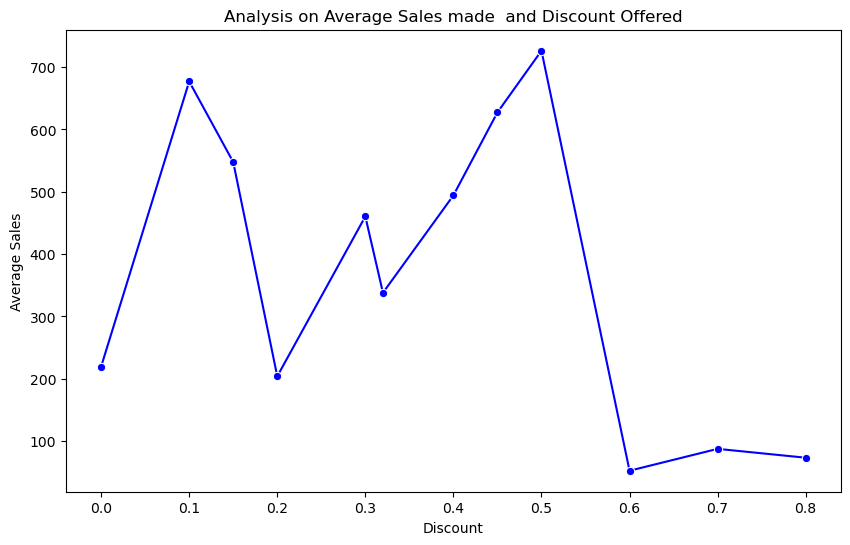

In [24]:
#How effective have our discounting strategies been in influencing sales, and is there an optimal discount
#threshold for maximizing profitability?
#Analysis on Average Sales made  and Discount Offered

# Calculate the average sales for each discount level
result_df = df.groupby('Discount').agg(Avg_Sales=('Sales', 'mean')).reset_index().sort_values(by='Discount')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line plot
sns.lineplot(x='Discount', y='Avg_Sales', data=result_df, marker='o', color='b', linestyle='-')

# Set the title and labels
plt.title('Analysis on Average Sales made  and Discount Offered')
plt.xlabel('Discount')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

### Findings

On average, our sales were just above $700, at discounts of 0.5 and least at 0.6 discounts. We didn't find a clear connection between the discount rates and sales. 

### Recommendation
Further analysis might reveal more about the impact of discounts on our sales.

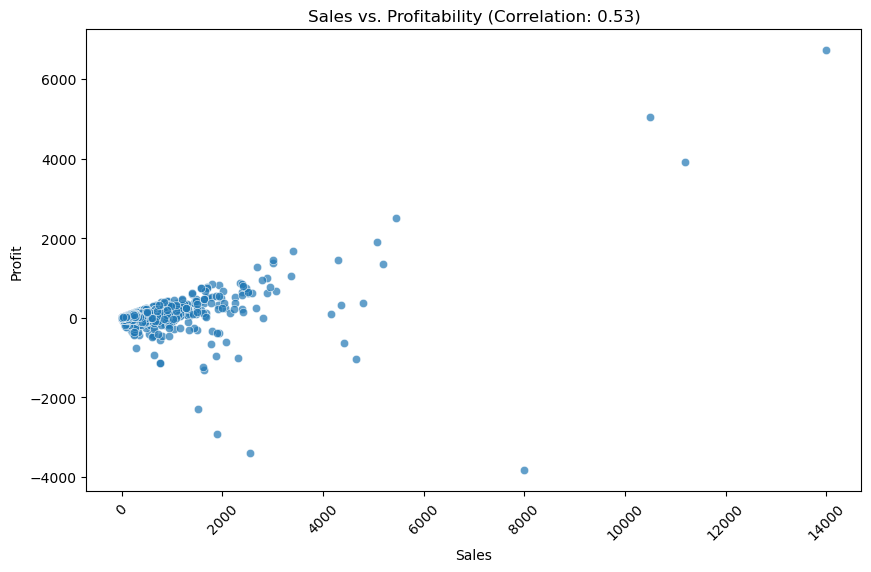

Sales Normality Test p-value: 0.0000
Profit Normality Test p-value: 0.0000
Number of outliers: 62
Spearman Rank Correlation: 0.5165
P-value: 0.0000
Reject Null Hypothesis. There is a statistically significant correlation between sales and profit.


In [25]:
#What insights can we derive from the correlation between profit and sales?
#How has the relationship between discount levels and profitability evolved over time,
#and what adjustments can be made to maintain a balance between sales and profitability?

#Sales vs. Profit Analysis
# Calculate correlation coefficient
correlation_coefficient = df['Sales'].corr(df['Profit'])

# Scatter plot for sales vs. profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.7)
plt.title(f'Sales vs. Profitability (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

#Check normality and outliers to pick the best hypothesis test
# Shapiro-Wilk test for normality
_, sales_normality_p_value = shapiro(df['Sales'])
_, profit_normality_p_value = shapiro(df['Profit'])

print(f"Sales Normality Test p-value: {sales_normality_p_value:.4f}")
print(f"Profit Normality Test p-value: {profit_normality_p_value:.4f}")

# Calculate z-scores to identify outliers
z_scores_sales = zscore(df['Sales'])
z_scores_profit = zscore(df['Profit'])

# Identify outliers based on a threshold (e.g., 3 standard deviations)
outliers = (abs(z_scores_sales) > 3) | (abs(z_scores_profit) > 3)

print(f"Number of outliers: {sum(outliers)}")

# Using the Sperman rank correlation
# H0: There is no correlation between sales and profit
# H1: There is a correlation between sales and profit


# Spearman rank correlation
spearman_corr, spearman_p_value = spearmanr(df['Sales'], df['Profit'])

print(f"Spearman Rank Correlation: {spearman_corr:.4f}")
print(f"P-value: {spearman_p_value:.4f}")

# Chosen significance level
alpha = 0.05

# List comprehension to check if p-value is less than significance level
reject_null_hypothesis = [p < alpha for p in [spearman_p_value]]

# Results
if reject_null_hypothesis[0]:
    print("Reject Null Hypothesis. There is a statistically significant correlation between sales and profit.")
else:
    print("Accept Null Hypothesis. There is no statistically significant correlation between sales and profit.")


### Findings
We discovered a positive connection (0.5165) between sales and profit. In simpler terms, when our sales go up, our profit tends to go up too. 
Using Spearman correlation was a reasonable approach as the normality assumption is violated, and a non-linear relationship as well as outliers are seen in the data. Spearman correlation provides a measure of the strength and direction of the monotonic relationship between two variables, allowing for a more flexible assessment of associations in the data as compared to the pearson correlation.

### Recommendation
This emphasizes the importance of boosting our overall sales.

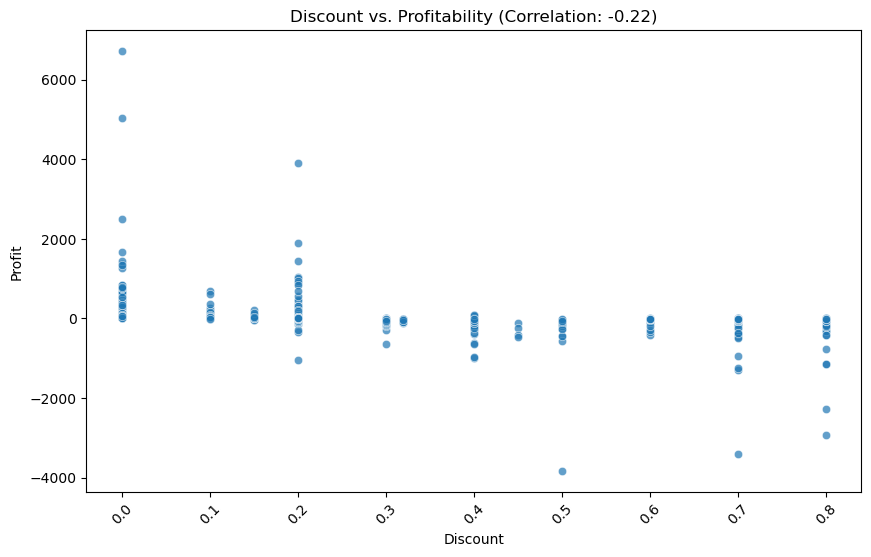

Discount Normality Test p-value: 0.0000
Profit Normality Test p-value: 0.0000
Number of outliers: 138
Spearman Rank Correlation: -0.5529
P-value: 0.0000
Reject Null Hypothesis. There is a statistically significant correlation between discount and profit.


In [26]:
#What insights can we derive from the correlation between profit and discount levels?
#How has the relationship between discount levels and profitability evolved over time,
#and what adjustments can be made to maintain a balance between sales and profitability?

# Discount vs. Profit Analysis
# Calculate correlation coefficient
correlation_coefficient = df['Discount'].corr(df['Profit'])

# Scatter plot for discount vs. profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.7)
plt.title(f'Discount vs. Profitability (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

#Check normality and outliers to pick the best hypothesis test

# Shapiro-Wilk test for normality
_, discount_normality_p_value = shapiro(df['Discount'])
_, profit_normality_p_value = shapiro(df['Profit'])

print(f"Discount Normality Test p-value: {discount_normality_p_value:.4f}")
print(f"Profit Normality Test p-value: {profit_normality_p_value:.4f}")

# Calculate z-scores to identify outliers
z_scores_discount = zscore(df['Discount'])
z_scores_profit = zscore(df['Profit'])

# Identify outliers based on a threshold (e.g., 3 standard deviations)
outliers = (abs(z_scores_discount) > 3) | (abs(z_scores_profit) > 3)

print(f"Number of outliers: {sum(outliers)}")

# Using the Sperman rank correlation

# H0: There is no correlation between discount and profit
# H1: There is a correlation between discount and profit

# Spearman rank correlation
spearman_corr, spearman_p_value = spearmanr(df['Discount'], df['Profit'])

print(f"Spearman Rank Correlation: {spearman_corr:.4f}")
print(f"P-value: {spearman_p_value:.4f}")

# Chosen significance level
alpha = 0.05

# List comprehension to check if p-value is less than significance level
reject_null_hypothesis = [p < alpha for p in [spearman_p_value]]

# Results
if reject_null_hypothesis[0]:
    print("Reject Null Hypothesis. There is a statistically significant correlation between discount and profit.")
else:
    print("Accept Null Hypothesis. There is no statistically significant correlation between discount and profit.")


### Findings
Statistically, there's a negative relationship (-0.5529) between the discount we offer and our profit. This means higher discounts are linked to lower profits. 

### Recommendation
We need to find a balance between attracting customers with discounts and keeping our profits healthy.



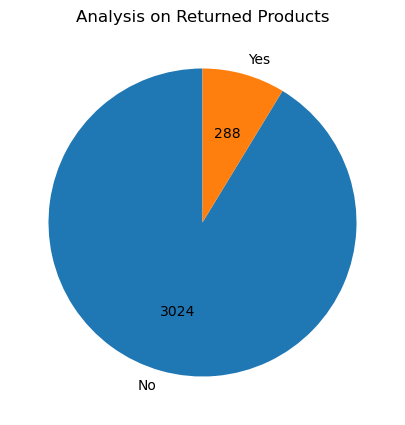

In [27]:
#Analysis on Returns
r_count = df['Returned'].value_counts()
plt.figure(figsize=(8,5))
plt.pie(r_count,labels=r_count.index,autopct=lambda r: '{:.0f}'.format(r * sum(r_count)/100),startangle = 90)
plt.title('Analysis on Returned Products')
plt.show()

### Findings
Out of the products we sold, 288 were returned, and 3,024 were not returned. 

### Recommendation
Understanding why products are returned can help us reduce return rates and boost customer satisfaction.


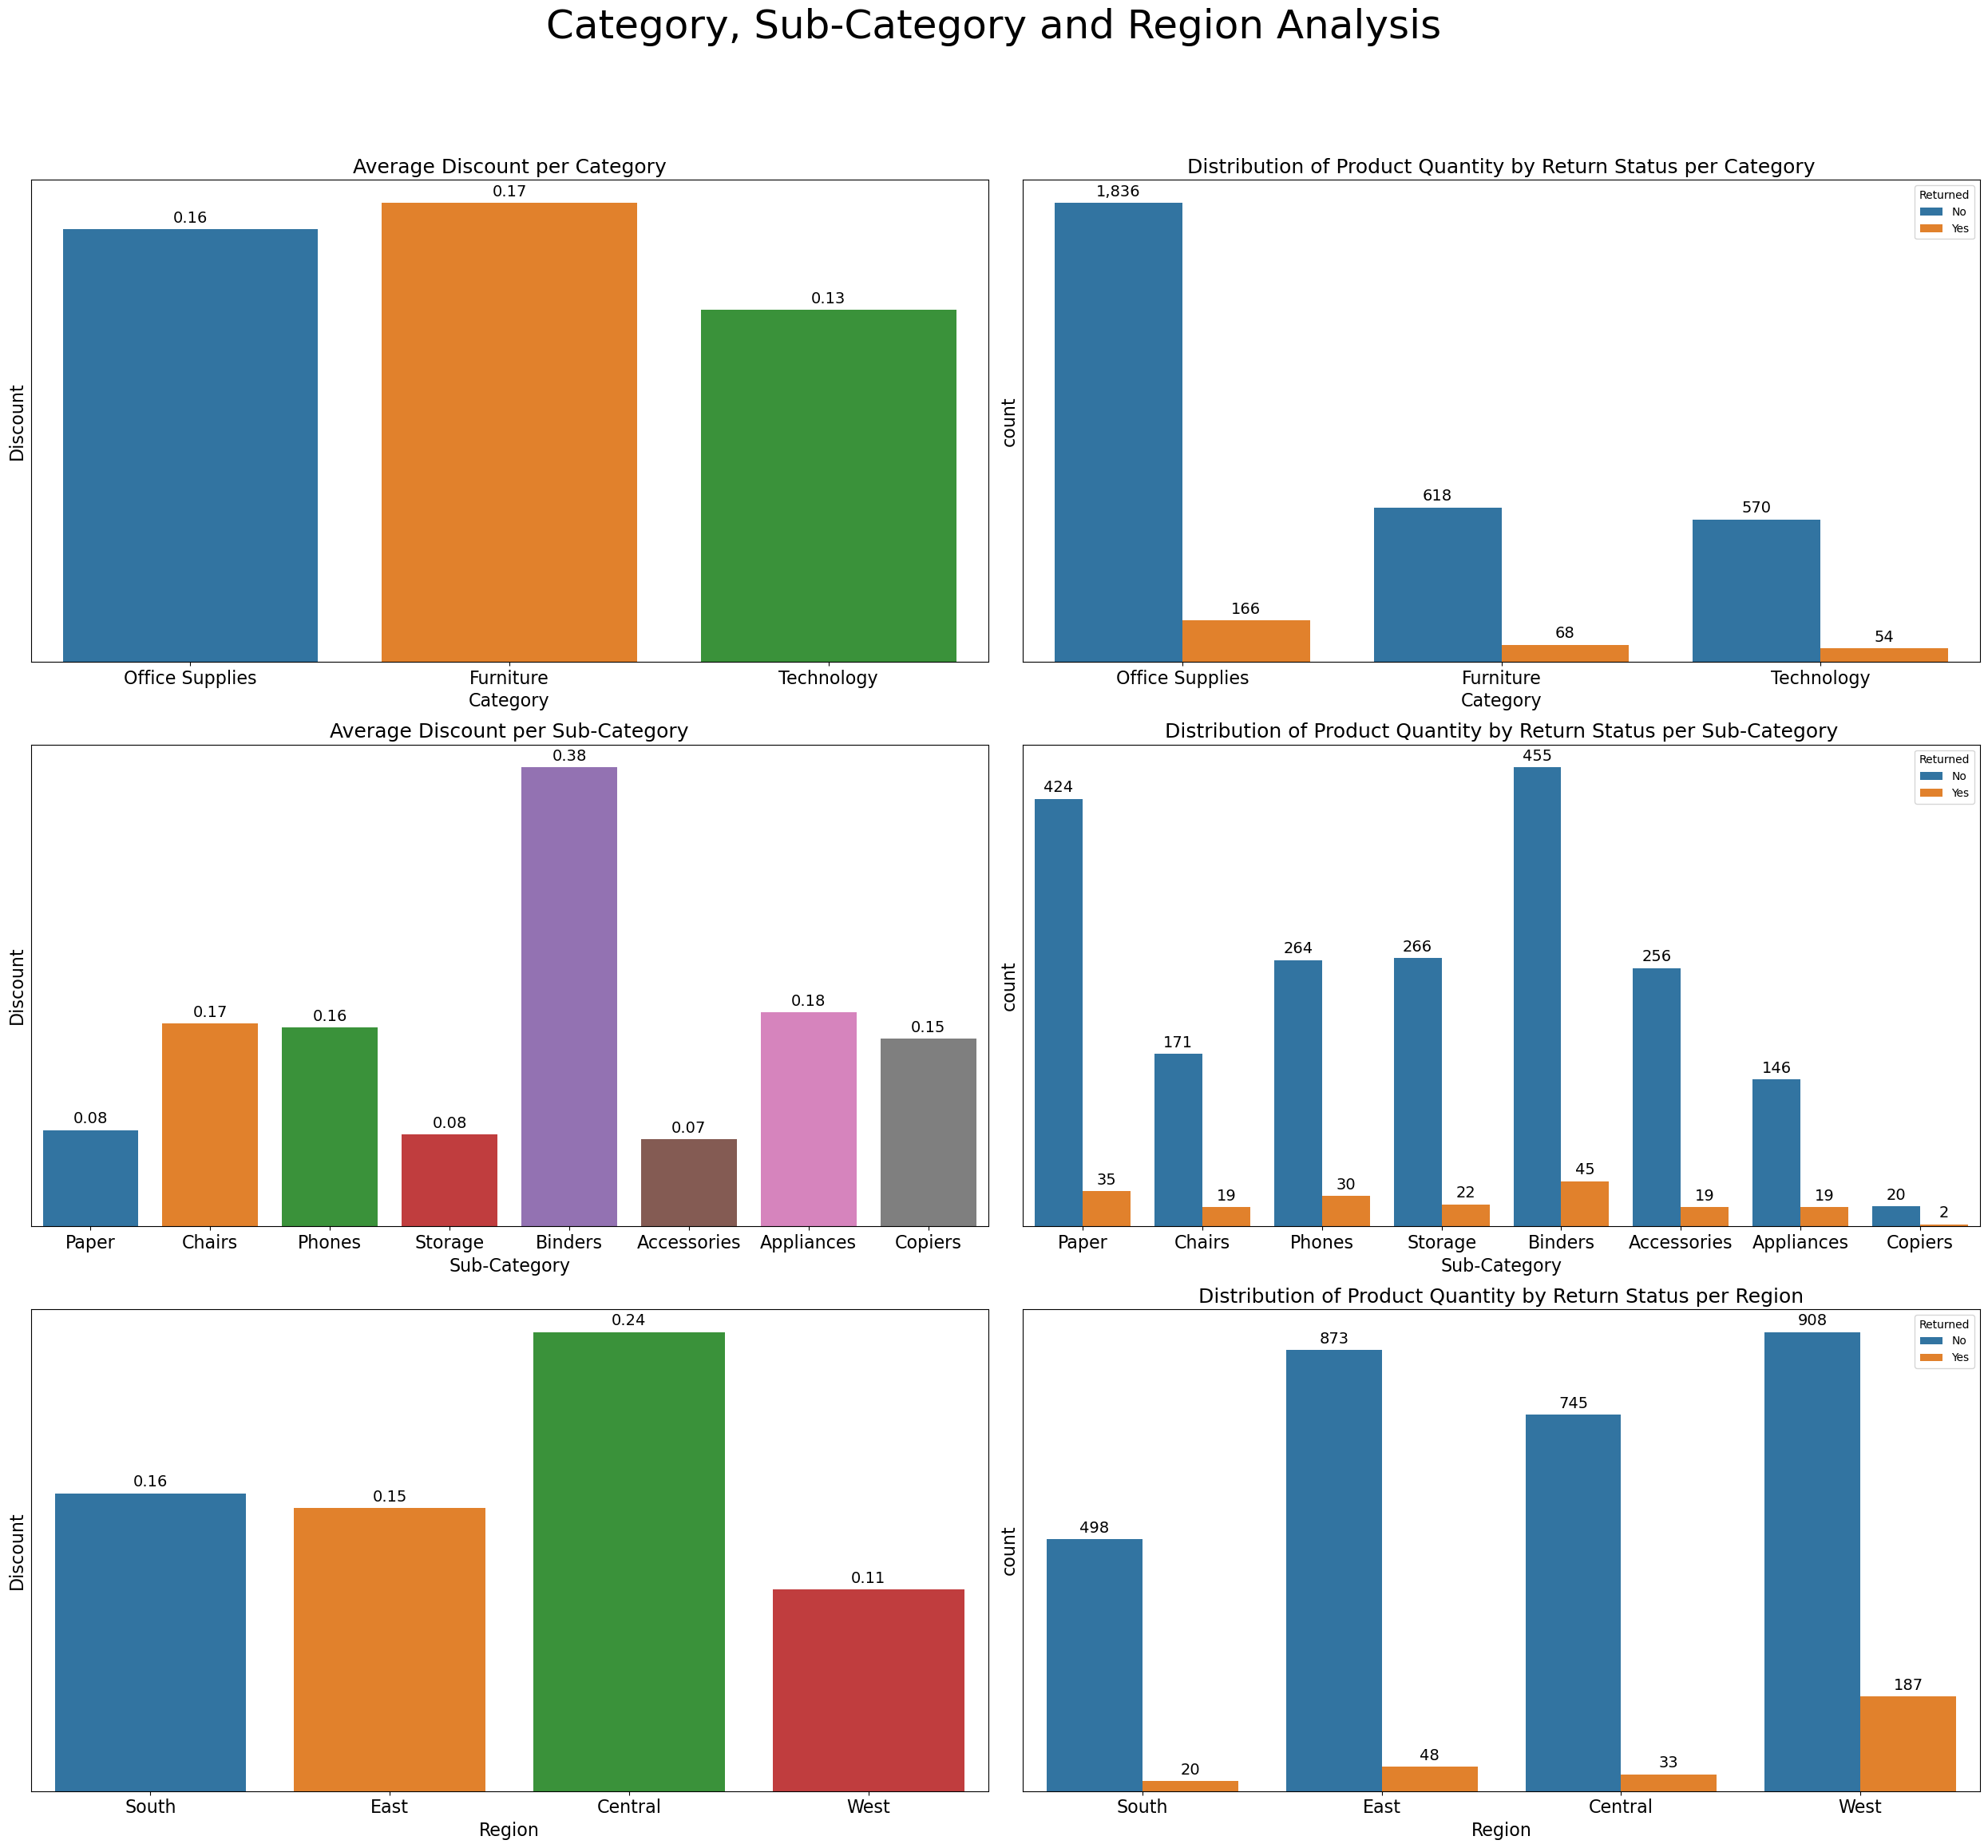

In [28]:
#Category, Sub-Category and Region Analysis focusing on Distribution of Product Quantity by Return Status and average discount
# Category Analysis
# Set up a 3x2 grid for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 22))
plt.suptitle('Category, Sub-Category and Region Analysis', fontsize=36, y=1.05)

# Analysis on Average Discount per Category
sns.barplot(x='Category', y='Discount', data=df, estimator='mean', errorbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Average Discount per Category')
# Annotate the bars with their values
for p in axes[0, 0].patches:
    height = p.get_height()
    axes[0, 0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)

# Distribution of Product Quantity by Return Status per Category
sns.countplot(x='Category', data=df, hue='Returned', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Product Quantity by Return Status per Category')
# Annotate the bars with their values
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)

# Get top8
top_profitable_subcategories = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(8).index

# Filter DataFrame for the top 5 profitable sub-categories
top_subcategory_df = df[df['Sub-Category'].isin(top_profitable_subcategories)]

# Analysis on Average Discount per Sub-Category
sns.barplot(x='Sub-Category', y='Discount', data=top_subcategory_df, estimator='mean', errorbar=None, ax=axes[1, 0])
axes[1, 0].set_title('Average Discount per Sub-Category')
# Annotate the bars with their values
for p in axes[1, 0].patches:
    height = p.get_height()
    axes[1, 0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)


# Distribution of Product Quantity by Return Status per Sub-Category
sns.countplot(x='Sub-Category', data=top_subcategory_df, hue='Returned', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Product Quantity by Return Status per Sub-Category')
# Annotate the bars with their values
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)

# Analysis on Average Discount per Region
sns.barplot(x='Region', y='Discount', data=df, estimator='mean', errorbar=None, ax=axes[2, 0])
# Annotate the bars with their values
for p in axes[2, 0].patches:
    height = p.get_height()
    axes[2, 0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)


# Distribution of Product Quantity by Return Status per Region
sns.countplot(x='Region', data=df, hue='Returned', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Product Quantity by Return Status per Region')
# Annotate the bars with their values
for p in axes[2, 1].patches:
    height = p.get_height()
    axes[2, 1].annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)

# Hide the y-axis tick values
for ax in axes.flatten():
    ax.yaxis.set_ticks([])
    ax.tick_params(axis='both', which='both', labelsize=16)
    ax.set_title(ax.get_title(), fontsize=18)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    
# Adjust layout
plt.tight_layout()

plt.show()

### Findings
Taking a closer look at how products are distributed based on return status and average discount, we notice that furniture has the highest discount, while office supplies have the most returned and non-returned goods. This is probably because office supplies have a large variety of products. 

Accessories had the least average discount among the top profitable subcategories, and copiers had the least returned and non-returned goods.

In terms of regions, Central had the highest discount, while the West had the least average discount. The West also had the most returned and non-returned goods, while the South had the least returned and non-returned goods. 

### Recommendation
This insight allows us to tailor our discount and return strategies based on specific product categories and regional patterns, ensuring a more targeted and effective approach.

To enhance overall profitability, the business should implement targeted operational and marketing interventions based on the analysis. Prioritize growth strategies in the East and Central regions to tap into untapped potential, considering the specific product categories contributing to high sales but lower-than-expected profitability. Refine discount strategies carefully, ensuring a balance that maximizes overall profitability. Focus on minimizing return rates in regions and categories with higher occurrences. Leverage successful practices from top-performing subcategories, like Copiers and Accessories, to optimize sales approaches across the entire product range. Consistent utilization of data-driven insights is crucial for making informed decisions and driving ongoing improvements in overall business performance.

### Summary of findings
The analysis highlights that the Technology category consistently leads in both sales and profitability over the past year, surpassing Office Supplies and Furniture. Regional variations indicate untapped potential in the East and Central regions, warranting targeted growth strategies. Specific attention is needed to identify product categories with high sales but lower-than-expected profitability. The effectiveness of discounting strategies reveals a delicate balance, with a negative correlation indicating the need for cautious optimization. Higher return rates in certain regions and categories necessitate focused efforts to minimize their impact on overall profitability. Insights from top-performing subcategories, such as Copiers and Accessories, offer valuable lessons for optimizing sales strategies across other categories.

### Summary of recommendations
To enhance overall profitability, the business should implement targeted operational and marketing interventions based on the analysis. Prioritize growth strategies in the East and Central regions to tap into untapped potential, considering the specific product categories contributing to high sales but lower-than-expected profitability. Refine discount strategies carefully, ensuring a balance that maximizes overall profitability. Focus on minimizing return rates in regions and categories with higher occurrences. Leverage successful practices from top-performing subcategories, like Copiers and Accessories, to optimize sales approaches across the entire product range. Consistent utilization of data-driven insights is crucial for making informed decisions and driving ongoing improvements in overall business performance.

### Conclusion
In conclusion, the comprehensive analysis of product and sales performance over the past year provides valuable insights for enhancing overall profitability. By identifying Technology as the consistently high-performing category and recognizing untapped potential in specific regions, the business is poised to strategically allocate resources for targeted growth. The delicate balance between discounting strategies and profitability underscores the need for careful optimization to maximize overall financial health. Addressing higher return rates in certain regions and product categories is crucial to safeguarding profitability. Drawing lessons from successful subcategories offers a roadmap for optimizing sales strategies across the entire product range. Moving forward, the business is encouraged to implement these insights into operational and marketing interventions, leveraging data-driven decision-making to achieve sustained enhancements in overall business performance.